In [158]:
# Run some setup code for this notebook.

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
from core.util import get_histogram
import matplotlib.pyplot as plt
import numpy as np
import Image
import os
import scipy

def pca(img):
    h, w = img.shape
    mu = np.mean(img, axis=0)
    dif = img-mu

    cm = np.dot(dif.T, dif) / (h-1)
    [U, S, V] = np.linalg.svd(cm)
    return dif, U, S

# Running PCA in a face dataset - for performance purposes I'm using only the first 50 faces and resizing every image to 32x32 

In [171]:
PATH = '../images/cropped_faces/'
img = list()
shape = (32, 32)
cont = 50

for path in os.listdir(PATH):
    i = np.array(Image.open(PATH+path).convert('L').resize(shape, Image.ANTIALIAS))
    img.append(i.flatten())
    cont -= 1

    if(cont<=0):
        break

img = np.array(img)

dif, U, S = pca(img)


# Displaying some face samples from the dataset

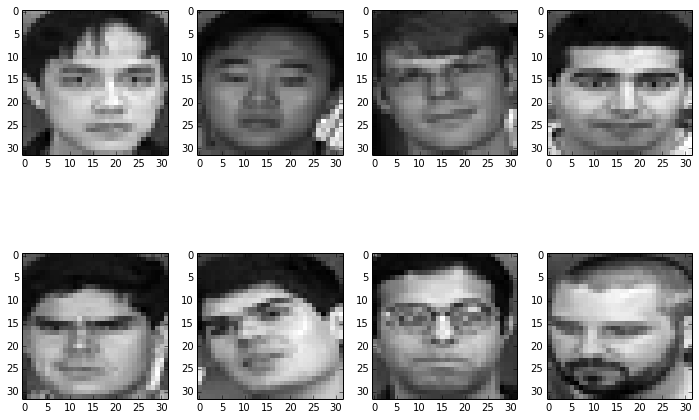

In [181]:
plt.subplot('241')
plt.imshow(img[0,:].reshape(shape))

plt.subplot('242')
plt.imshow(img[1,:].reshape(shape))

plt.subplot('243')
plt.imshow(img[2,:].reshape(shape))

plt.subplot('244')
plt.imshow(img[3,:].reshape(shape))

plt.subplot('245')
plt.imshow(img[4,:].reshape(shape))

plt.subplot('246')
plt.imshow(img[5,:].reshape(shape))

plt.subplot('247')
plt.imshow(img[6,:].reshape(shape))

plt.subplot('248')
plt.imshow(img[7,:].reshape(shape))

plt.show()

# Run PCA and visualize the eigenvectors which are in this case eigenfaces
## Displaying the two first eigenvectors

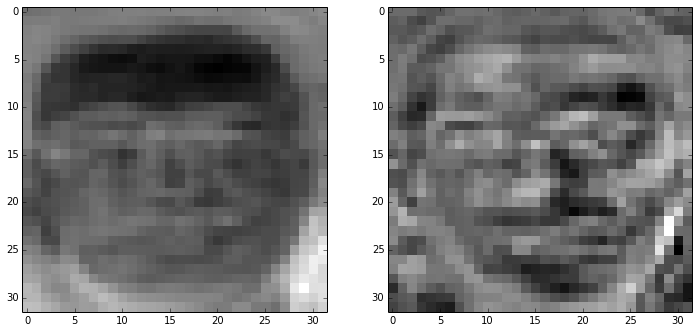

In [167]:
im = U[:, 0]
maxv = np.abs(im).max()
im = im.reshape(shape) / maxv

plt.subplot('121')
plt.imshow(im, 'gray')

im = U[:, 1]
maxv = np.abs(im).max()
im = im.reshape(shape) / maxv

plt.subplot('122')
plt.imshow(im, 'gray')

plt.show()
